<a href="https://colab.research.google.com/github/SnehasishKabi17/Dl/blob/main/Dl1311.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install google-colab-patches

ERROR: Could not find a version that satisfies the requirement google-colab-patches (from versions: none)
ERROR: No matching distribution found for google-colab-patches


In [ ]:
pip install torch

In [ ]:
import torch
import torchvision
from torchvision.transforms import functional as F
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


In [ ]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle',
    'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench',
    'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant',
    'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven',
    'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 135MB/s]


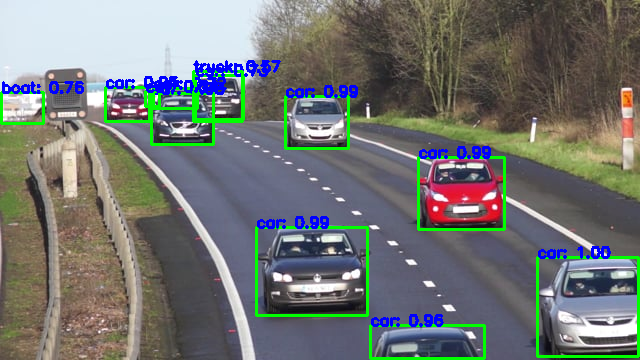

In [ ]:
def detect_objects(image_path, confidence_threshold=0.5):
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from '{image_path}'. Please check the file path and ensure the image exists.")
        return None

    original_image = image.copy()
    #convert image to tensor and normalize
    image_tensor=F.to_tensor(image)

    with torch.no_grad():
        predictions=model([image_tensor])
    boxes=predictions[0]['boxes'].cpu().numpy()
    labels=predictions[0]['labels'].cpu().numpy()
    scores=predictions[0]['scores'].cpu().numpy()
    for i, box in enumerate(boxes):
        if scores[i] >= confidence_threshold:
            label = COCO_INSTANCE_CATEGORY_NAMES[labels[i]]
            score = scores[i]
            start_point = (int(box[0]), int(box[1]))
            end_point=(int(box[2]), int(box[3]))
            cv2.rectangle(original_image, start_point, end_point, (0, 255, 0), 2)
            cv2.putText(original_image, f"{label}: {score:.2f}", start_point, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    return original_image

if __name__ == "__main__":
    IMAGE_PATH = "/content/cars.jpg"  # Replace with your image path
    detected_image = detect_objects(IMAGE_PATH)

    # Display the output
    if detected_image is not None:
        cv2_imshow(detected_image)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Detected objects:
person: 1
bicycle: 10
car: 1


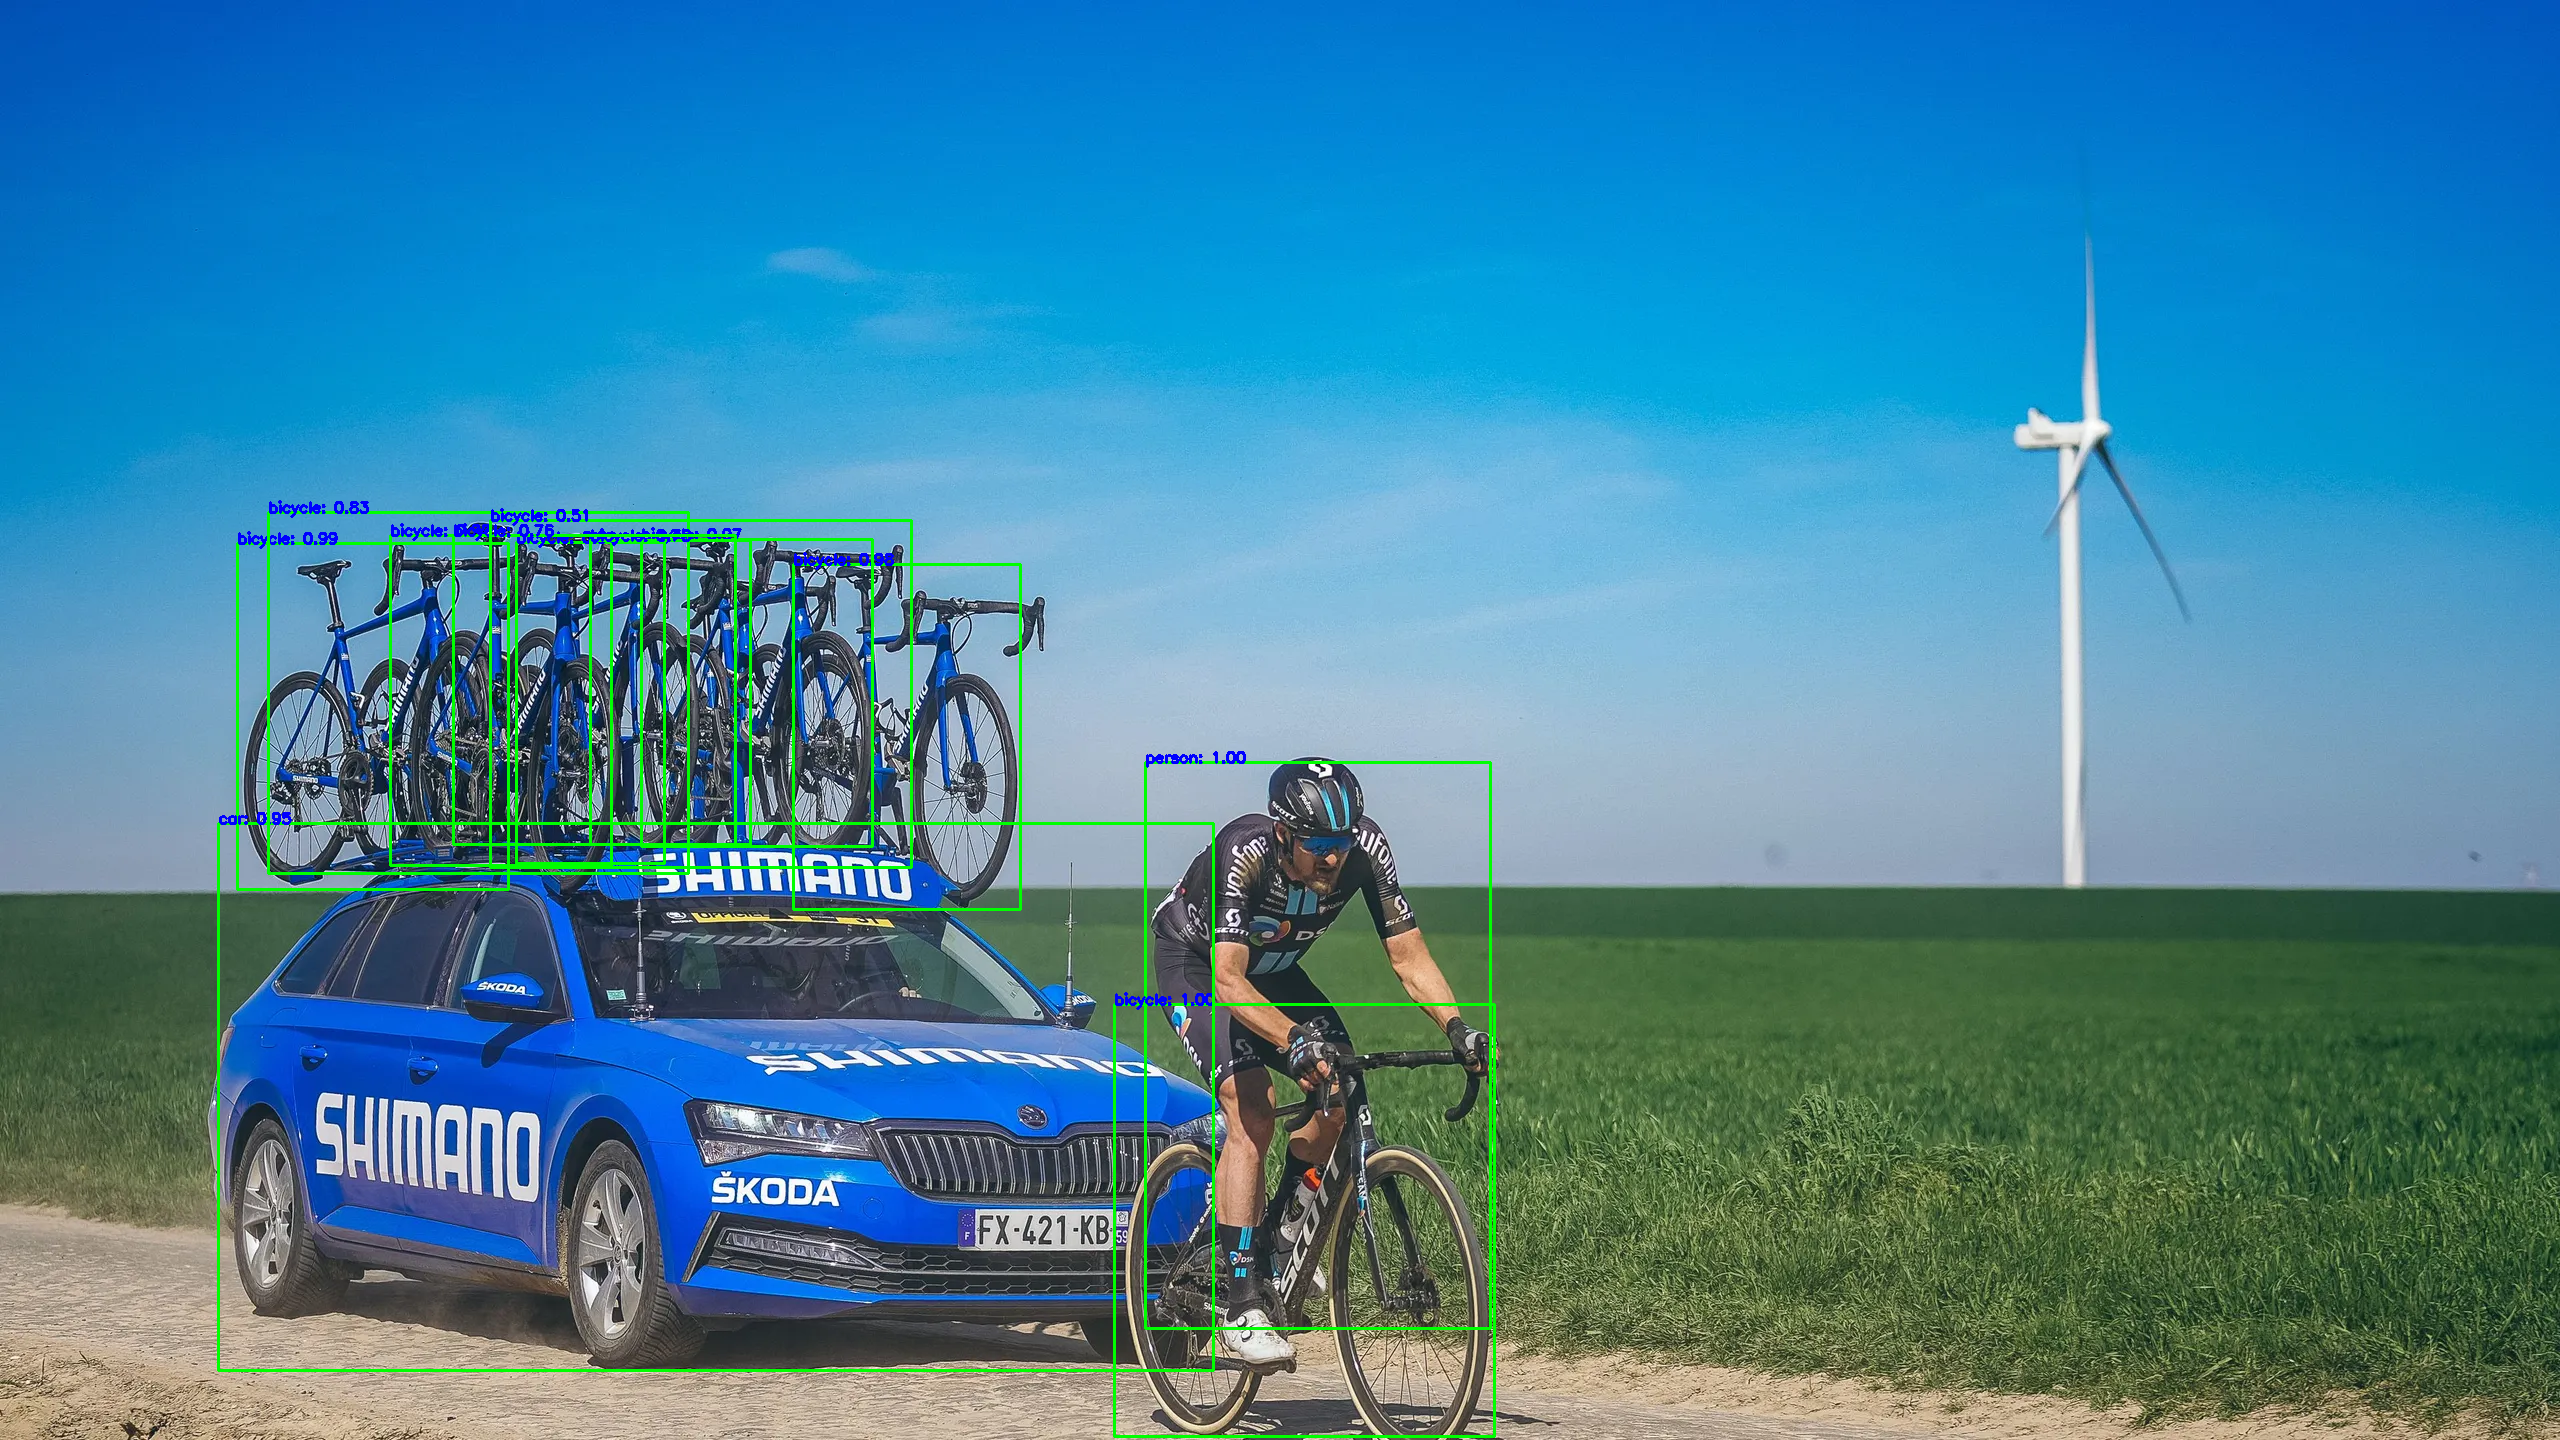

In [2]:
import torch
import torchvision
from torchvision.transforms import functional as F
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the pre-trained Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# COCO class labels for detection
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle',
    'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench',
    'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant',
    'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven',
    'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

def detect_objects(image_path, confidence_threshold=0.5):
    """
    Detects objects in the image and returns the image with bounding boxes and counts of each detected object.

    Parameters:
        image_path (str): Path to the image file.
        confidence_threshold (float): The minimum confidence score to consider an object for detection.

    Returns:
        np.ndarray: Image with bounding boxes and labels, and counts of detected objects.
    """
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from '{image_path}'. Please check the file path and ensure the image exists.")
        return None

    original_image = image.copy()

    # Convert the image to RGB (Faster R-CNN expects RGB images)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert the image to a tensor and normalize
    image_tensor = F.to_tensor(image).unsqueeze(0)  # Add batch dimension

    # Perform object detection
    with torch.no_grad():
        predictions = model(image_tensor)

    # Extract predictions
    boxes = predictions[0]['boxes'].cpu().numpy()
    labels = predictions[0]['labels'].cpu().numpy()
    scores = predictions[0]['scores'].cpu().numpy()

    # Initialize a dictionary to store counts for each detected object
    object_counts = {}

    # Loop over all detections and process them
    for i, box in enumerate(boxes):
        if scores[i] >= confidence_threshold:
            label = COCO_INSTANCE_CATEGORY_NAMES[labels[i]]
            score = scores[i]

            # Update the count for the detected label
            if label in object_counts:
                object_counts[label] += 1
            else:
                object_counts[label] = 1

            # Draw the bounding box and label on the image
            start_point = (int(box[0]), int(box[1]))
            end_point = (int(box[2]), int(box[3]))
            cv2.rectangle(original_image, start_point, end_point, (0, 255, 0), 2)
            cv2.putText(original_image, f"{label}: {score:.2f}", start_point, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Print the object counts
    print("Detected objects:")
    for label, count in object_counts.items():
        print(f"{label}: {count}")

    # Return the image with bounding boxes and detections
    return original_image, object_counts

if __name__ == "__main__":
    IMAGE_PATH = "/content/object2.webp"  # Replace with your image path
    detected_image, object_counts = detect_objects(IMAGE_PATH)

    # Display the output
    if detected_image is not None:
        cv2_imshow(detected_image)
